<center> <h1>Día 4</h1> </center>
<center> <h2>Similitud de compuestos y clusterización</h2> </center>

---
<center> <h2>Antes de comenzar</h2> </center>

En la celda que se encuentra a continuación vamos a importar todas las librerías que se van a usar.

❗ Para correr la celda podes apretar el boton "Run" o usar el comando "Ctrl + Enter"

👇

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit.Chem import Descriptors
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

A lo largo de este día vamos a estar trabajando con los comandos de RDKit para evaluar la similitud química de una lista de moléculas y agruparlas.

Esta guía está elaborada en base a https://chem-workflows.com/articles/2019/06/28/similarity-analysis-of-compound-databases/

En el caso de que quieras profundizar en algún comando podrás encontrar más información en ese link.

---
<center> <h2>Manos a la obra</h2> </center>


Vamos a cargar los datos usando los mismos comando que ayer. Hoy vamos a trabajar con un subset de 50 moléculas tomadas al azar de la tabla con la que venimos trabajando. 

Los comandos que con los que vamos a trabajar hoy son más costosos computacionalmente, por lo que trabajar con un número muy grande de moléculas nos tomaría bastante tiempo. Usando un número más pequeño vamos a poder trabajar más rápido. 

👇

In [2]:
smiles_tabla = pd.read_csv('smiles_tabla_sample.csv')

💡 Cada vez que trabajemos con RDKit vamos a tener que calcular las moléculas

In [3]:
moleculas = [Chem.MolFromSmiles(smiles) for smiles in smiles_tabla['smiles']]
smiles_tabla['moleculas'] = moleculas

In [4]:
smiles_tabla

,Unnamed: 0,ID,smiles,moleculas,MW,TPSA,nRotB,HBD,HBA,logP,clusters
0,0,2183,C1=CC=C(C=C1)C2=CC=CC=C2OCC3=CC=C(C=C3)C(=O)N/...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,451.153206,93.83,8.0,1.0,5.0,5.60470,1
1,1,4185,COC1=NC2=C(C3=C(C=C(C=C3)Cl)N=C2C=C1)NC4=CC(=C...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,615.201348,151.51,7.0,5.0,8.0,5.15720,5
2,2,1707,CCCC1=NC2=CC=CC=C2C(=C1CC)C(=O)OCC(=O)N3CCC4=C...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,402.194343,59.50,6.0,0.0,4.0,4.49580,0
3,3,1312,CC(C)(C)C1=CC=C(C=C1)OP(=O)(C)NC2=CC=C(C=C2)SC...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,403.098271,38.33,5.0,1.0,3.0,6.90980,4
4,4,1946,CCOC1=C(C=C(C=C1)C(=O)NC2=CC=C(C=C2)CC3=CC=NC=...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,410.062990,51.22,6.0,1.0,3.0,5.08590,0
5,5,493,C[C@@H]1[C@H]([C@]2([C@H]3C4[C@]1([C@@H]5C=C(C...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,654.246497,144.28,7.0,3.0,10.0,3.12420,5
6,6,2718,CC1CC(CN(C1)CCCNC(=O)C2CCN(CC2)C3=NC4=C(C=C(C=...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,442.276633,48.47,6.0,1.0,5.0,4.61374,0
7,7,2519,CC1=C(C2=NC3=CC=CC=C3N2C4=C1CCN4CCCN(C)C)C#N,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,333.195346,47.57,4.0,0.0,5.0,2.98180,2
8,8,57,CC1=C(OC2=CC=CC=C12)C(=O)OC(C)CCN(C)C.Cl,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,311.128821,42.68,5.0,0.0,4.0,3.66002,2
9,9,2420,CC1=NC=C(S1)CN2CCCC(C2)CCC(=O)NCC3=CC=CC=C3F,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,375.178062,45.23,7.0,1.0,4.0,3.89922,0


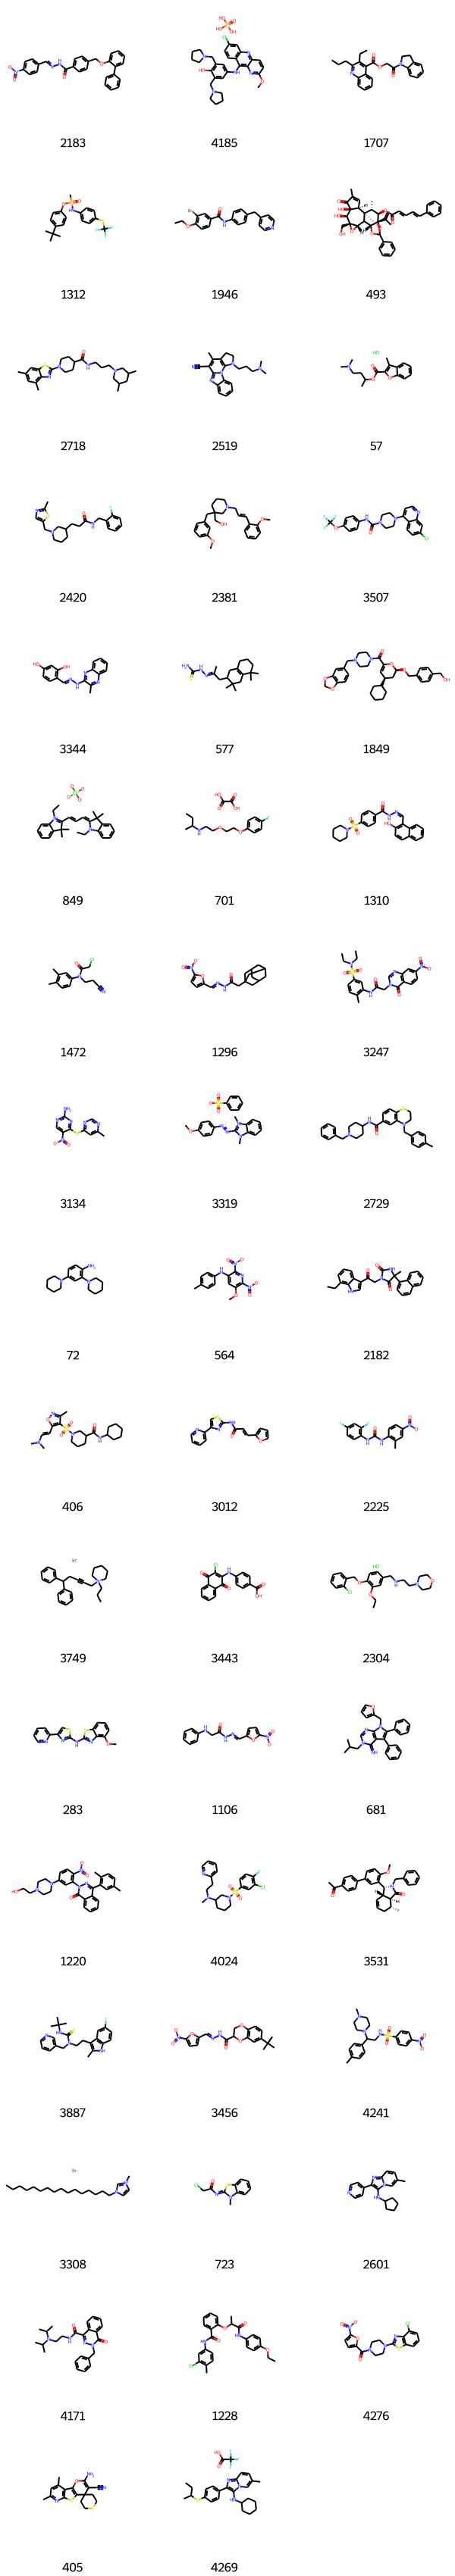

In [5]:
Chem.Draw.MolsToGridImage(smiles_tabla['moleculas'], legends = [(str(smiles_tabla['ID'][i])) for i in range(len(smiles_tabla))])

---
El RDKit tiene una variedad de funciones integradas para generar fingerprints moleculares y usarlas para calcular la similitud molecular. 

Si te interesa este tema podés leer más en este link: https://www.rdkit.org/docs/GettingStartedInPython.html

Para poder comparar las moléculas y medir su similitud, primero tenemos que generear el fingerprint molecular de cada una usando la función llamada `FingerprintMols`

👇

In [6]:
fps = [FingerprintMols.FingerprintMol(mol) for mol in smiles_tabla['moleculas']]

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

In [7]:
fps

Vamos a verificar que RDKit pudo calcular el fingerprint para todas las moléculas

👇

In [8]:
len(smiles_tabla)
len(fps)

50

Ahora que tenemos los fingerprints podemos empezar a comparar moléculas.
Podemos hacerlo usando la función llamada `FingerprintSimilarity`

Vamos a comparar la molécula 1 con la 2

👇

0.2721804511278195


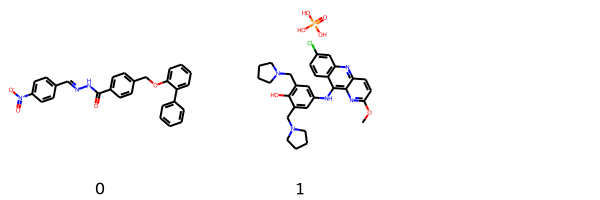

In [9]:
print(DataStructs.FingerprintSimilarity(fps[0],fps[1]))
Draw.MolsToGridImage([smiles_tabla['moleculas'][0],smiles_tabla['moleculas'][1]],legends=['0','1'])

La función `FingerprintSimilarity` arroja valores entre 0 y 1, siendo 1 el que indica cuando dos moléculas son idénticas.

El valor obtenido en este caso nos dice que estás dos moléculas no son tan similares.

Probemos con dos moléculas más parecidas

👇

0.4235225955967555


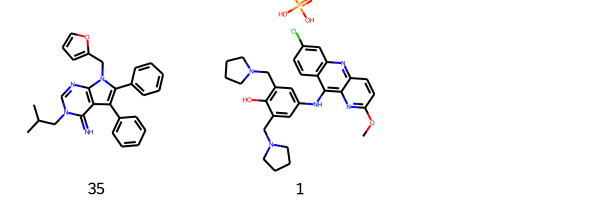

In [10]:
print(DataStructs.FingerprintSimilarity(fps[35],fps[1]))
Draw.MolsToGridImage([smiles_tabla['moleculas'][35],smiles_tabla['moleculas'][1]],legends=['35','1'])

En este caso podemos ver, en base a la estructura y al valor obtenido, que la molécula 1 es más similiar a la 35 que a la 0

💭 ¿Podés encontrar otra molécula con mayor similitud a la molécula 1?

❗ Escribí el comando en la celda que se encuentra debajo

👇

Como ayer, tenemos mucha información y resulta dificil sacar conclusiones a partir de los datos.
Vamos a ver como podemos generar graficos con estos datos.

Primero vamos a generar una tabla con la comparación de similitud de todas las moléculas

👇

In [11]:
size=len(smiles_tabla)
hmap=np.empty(shape=(size,size))
table=pd.DataFrame()
for i in range(len(smiles_tabla)):
    for j in range(len(smiles_tabla)):
        similarity=DataStructs.FingerprintSimilarity(fps[i],fps[j])
        hmap[i,j]=similarity
        table.loc[smiles_tabla['ID'][i],smiles_tabla['ID'][j]]=similarity

Luego de ejecutar este comando obtuvimos una tabla con la comparación de la similitud de todas las moléculas

👇

In [12]:
table

,2183,4185,1707,1312,1946,493,2718,2519,57,2420,...,3456,4241,3308,723,2601,4171,1228,4276,405,4269
2183,1.000000,0.272180,0.292439,0.401662,0.434174,0.271605,0.242905,0.291034,0.228102,0.362550,...,0.297650,0.279003,0.286697,0.199632,0.242961,0.264359,0.296435,0.259970,0.296140,0.262918
4185,0.272180,1.000000,0.414940,0.422472,0.435955,0.393148,0.361777,0.431045,0.287257,0.462857,...,0.321258,0.313609,0.313008,0.253410,0.329987,0.351583,0.335286,0.401174,0.458075,0.357419
1707,0.292439,0.414940,1.000000,0.463146,0.476348,0.461985,0.356481,0.506188,0.328691,0.449838,...,0.345347,0.311203,0.316103,0.270252,0.375326,0.390385,0.345329,0.400865,0.514525,0.400504
1312,0.401662,0.422472,0.463146,1.000000,0.369596,0.445255,0.416965,0.435518,0.368020,0.322581,...,0.415961,0.400000,0.273585,0.341310,0.403488,0.411226,0.409439,0.432819,0.469098,0.446347
1946,0.434174,0.435955,0.476348,0.369596,1.000000,0.456250,0.412736,0.458999,0.395647,0.329773,...,0.442683,0.401022,0.266355,0.353015,0.422404,0.431530,0.517663,0.450829,0.473790,0.451759
493,0.271605,0.393148,0.461985,0.445255,0.456250,1.000000,0.345588,0.462018,0.310983,0.469045,...,0.355953,0.286074,0.327381,0.286628,0.359903,0.378201,0.335678,0.404540,0.526456,0.395171
2718,0.242905,0.361777,0.356481,0.416965,0.412736,0.345588,1.000000,0.397088,0.251975,0.451028,...,0.298799,0.254386,0.311715,0.327883,0.351515,0.311080,0.269381,0.490421,0.404706,0.354954
2519,0.291034,0.431045,0.506188,0.435518,0.458999,0.462018,0.397088,1.000000,0.304175,0.475269,...,0.356226,0.310114,0.318812,0.286573,0.477164,0.373383,0.321900,0.412621,0.520856,0.494764
57,0.228102,0.287257,0.328691,0.368020,0.395647,0.310983,0.251975,0.304175,1.000000,0.377049,...,0.283981,0.232759,0.304444,0.200686,0.256508,0.292109,0.252542,0.301083,0.322923,0.268398
2420,0.362550,0.462857,0.449838,0.322581,0.329773,0.469045,0.451028,0.475269,0.377049,1.000000,...,0.394118,0.414414,0.282710,0.367554,0.424737,0.417520,0.379778,0.451435,0.478788,0.439326


In [13]:
linked = linkage(hmap,'single')
labelList = [smiles_tabla['ID'][i] for i in range(len(smiles_tabla))]

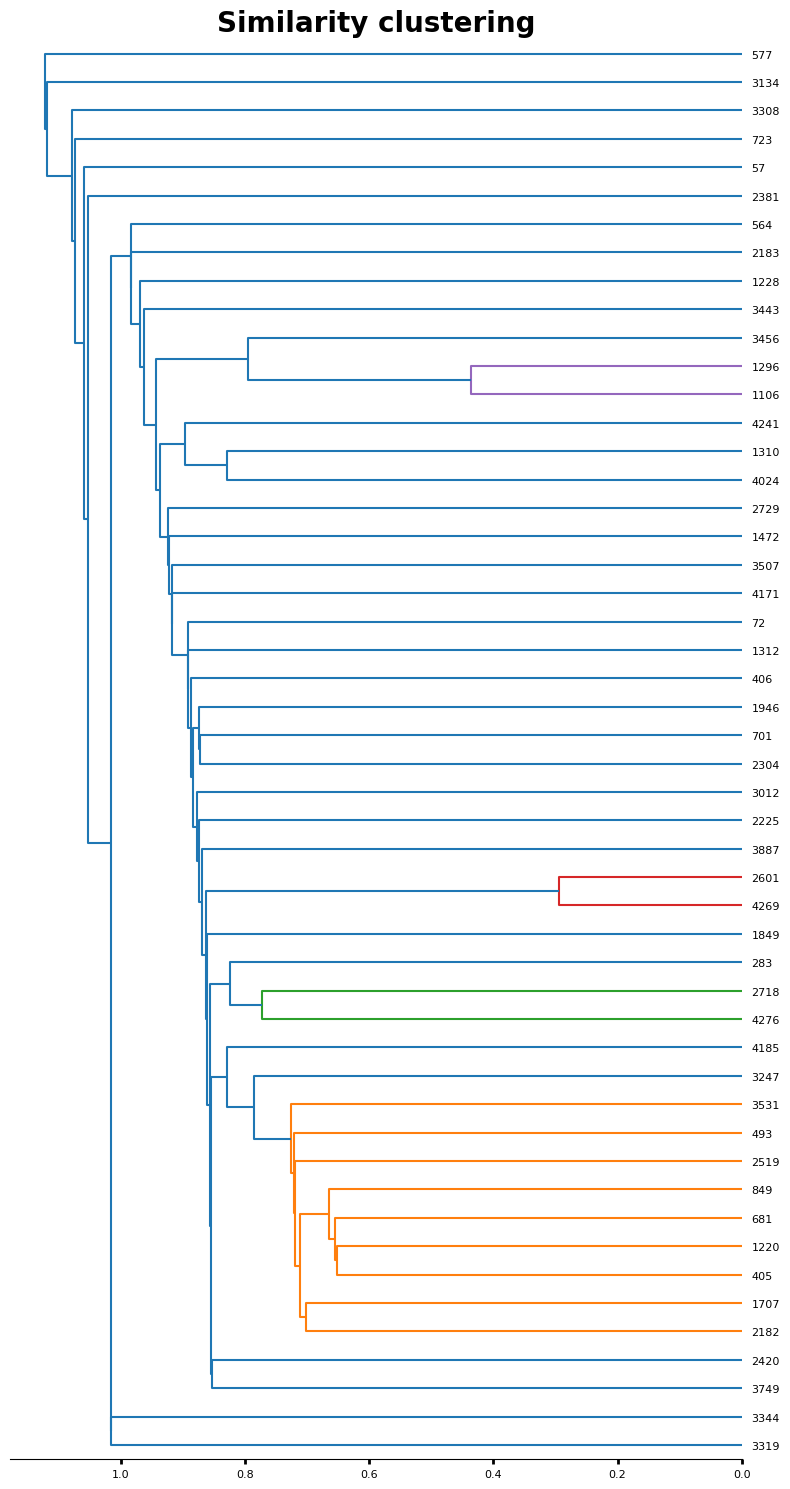

In [14]:
plt.figure(figsize=(8,15))

ax1=plt.subplot()
o=dendrogram(linked,  
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.title('Similarity clustering',fontsize=20,weight='bold')
plt.tick_params ('both',width=2,labelsize=8)
plt.tight_layout()
plt.show() 

In [15]:
# This will give us the clusters in order as the last plot
new_data=list(reversed(o['ivl']))

# we create a new table with the order of HCL
hmap_2=np.empty(shape=(size,size))
for index,i in enumerate(new_data):
    for jndex,j in enumerate(new_data):
        hmap_2[index,jndex]=table.loc[i].at[j]

[]

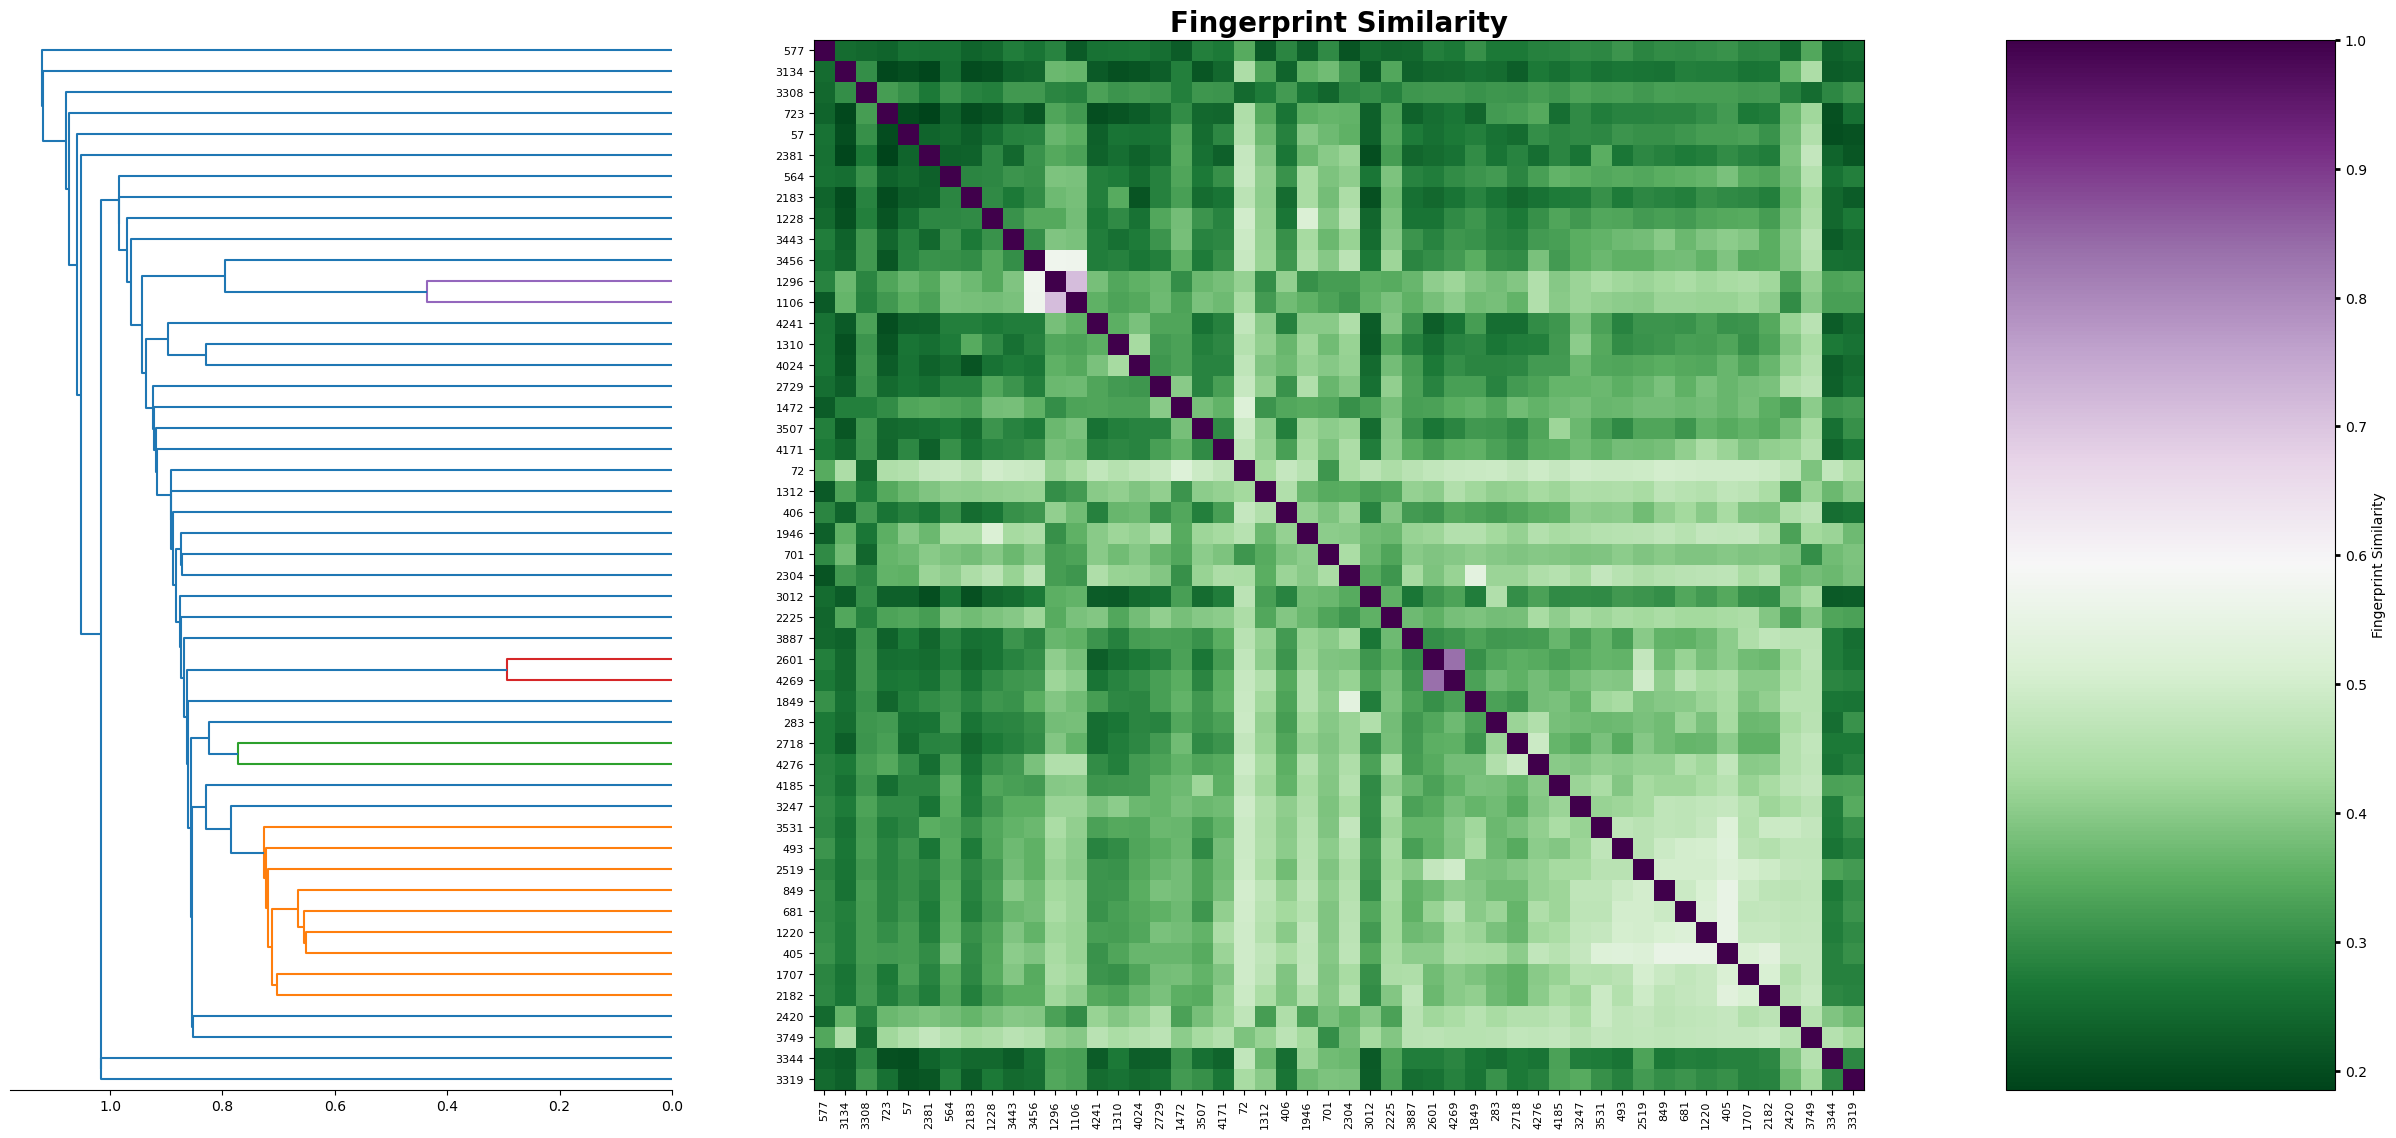

In [16]:
figure= plt.figure(figsize=(30,30))
gs1 = gridspec.GridSpec(2,7)
gs1.update(wspace=0.01)
ax1 = plt.subplot(gs1[0:-1, :2])
dendrogram(linked, orientation='left', distance_sort='descending',show_leaf_counts=True,no_labels=True)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = plt.subplot(gs1[0:-1,2:6])
f=ax2.imshow (hmap_2, cmap='PRGn_r', interpolation='nearest')

ax2.set_title('Fingerprint Similarity',fontsize=20,weight='bold')
ax2.set_xticks (range(len(new_data)))
ax2.set_yticks (range(len(new_data)))
ax2.set_xticklabels (new_data,rotation=90,size=8)
ax2.set_yticklabels (new_data,size=8)

ax3 = plt.subplot(gs1[0:-1,6:7])
m=plt.colorbar(f,cax=ax3,shrink=0.75,orientation='vertical',spacing='uniform',pad=0.01)
m.set_label ('Fingerprint Similarity')

plt.tick_params ('both',width=2)
plt.plot()

In [17]:
numero_compuesto_1 = 4355
numero_compuesto_2 = 4166

for i in range(len(smiles_tabla)):
    if smiles_tabla['ID'][i] == numero_compuesto_1:
        molecula_1 = smiles_tabla['moleculas'][i]
        fps_1 = fps[i]
    else:
        pass

for i in range(len(smiles_tabla)):
    if smiles_tabla['ID'][i] == numero_compuesto_2:
        molecula_2 = smiles_tabla['moleculas'][i]
        fps_2 = fps[i]
    else:
        pass
try:    
    print(DataStructs.FingerprintSimilarity(fps_1,fps_2))
    Draw.MolsToGridImage([molecula_1,molecula_2],legends=[str(numero_compuesto_1),str(numero_compuesto_2)])
except:
    pass

# Exploring the chemical space by Principal Component Analysis (PCA) and clustering
https://chem-workflows.com/articles/2019/07/02/exploring-the-chemical-space-by-pca/

In [18]:
# We will calculate the descriptors and add them to our table
for i in range(len(smiles_tabla)):
    mol=smiles_tabla['moleculas'][i]
    smiles_tabla.loc[i,'MW']=Descriptors.ExactMolWt (mol)
    smiles_tabla.loc[i,'TPSA']=Chem.rdMolDescriptors.CalcTPSA(mol) #Topological Polar Surface Area
    smiles_tabla.loc[i,'nRotB']=Descriptors.NumRotatableBonds (mol) #Number of rotable bonds
    smiles_tabla.loc[i,'HBD']=Descriptors.NumHDonors(mol) #Number of H bond donors
    smiles_tabla.loc[i,'HBA']=Descriptors.NumHAcceptors(mol) #Number of H bond acceptors
    smiles_tabla.loc[i,'logP']=Descriptors.MolLogP(mol) #LogP

In [19]:
smiles_tabla

,Unnamed: 0,ID,smiles,moleculas,MW,TPSA,nRotB,HBD,HBA,logP,clusters
0,0,2183,C1=CC=C(C=C1)C2=CC=CC=C2OCC3=CC=C(C=C3)C(=O)N/...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,451.153206,93.83,8.0,1.0,5.0,5.60470,1
1,1,4185,COC1=NC2=C(C3=C(C=C(C=C3)Cl)N=C2C=C1)NC4=CC(=C...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,615.201348,151.51,7.0,5.0,8.0,5.15720,5
2,2,1707,CCCC1=NC2=CC=CC=C2C(=C1CC)C(=O)OCC(=O)N3CCC4=C...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,402.194343,59.50,6.0,0.0,4.0,4.49580,0
3,3,1312,CC(C)(C)C1=CC=C(C=C1)OP(=O)(C)NC2=CC=C(C=C2)SC...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,403.098271,38.33,5.0,1.0,3.0,6.90980,4
4,4,1946,CCOC1=C(C=C(C=C1)C(=O)NC2=CC=C(C=C2)CC3=CC=NC=...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,410.062990,51.22,6.0,1.0,3.0,5.08590,0
5,5,493,C[C@@H]1[C@H]([C@]2([C@H]3C4[C@]1([C@@H]5C=C(C...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,654.246497,144.28,7.0,3.0,10.0,3.12420,5
6,6,2718,CC1CC(CN(C1)CCCNC(=O)C2CCN(CC2)C3=NC4=C(C=C(C=...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,442.276633,48.47,6.0,1.0,5.0,4.61374,0
7,7,2519,CC1=C(C2=NC3=CC=CC=C3N2C4=C1CCN4CCCN(C)C)C#N,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,333.195346,47.57,4.0,0.0,5.0,2.98180,2
8,8,57,CC1=C(OC2=CC=CC=C12)C(=O)OC(C)CCN(C)C.Cl,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,311.128821,42.68,5.0,0.0,4.0,3.66002,2
9,9,2420,CC1=NC=C(S1)CN2CCCC(C2)CCC(=O)NCC3=CC=CC=C3F,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,375.178062,45.23,7.0,1.0,4.0,3.89922,0


In [20]:
descriptors = smiles_tabla.loc[:, ['MW', 'TPSA', 'nRotB', 'HBD','HBA', 'logP']].values

In [21]:
descriptors_std = StandardScaler().fit_transform(descriptors)

In [22]:
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)

In [23]:
descriptors_pca= pd.DataFrame(descriptors_2d)
descriptors_pca.index = smiles_tabla.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.683045,-1.434006,0.125964,-0.360663,-0.654368,-0.703188
1,4.958366,-1.557857,-1.451328,1.358673,0.478622,0.111122
2,-0.917902,-0.556659,0.363667,-0.763209,-0.139205,-0.331217
3,-1.239825,-1.780045,-1.385242,-0.392216,-0.456654,-0.175642
4,-0.887829,-1.126128,-0.348209,0.062345,0.023074,-0.233182
5,4.754989,-0.557063,0.376893,-0.309381,0.919942,0.609426
6,-0.218619,-0.902951,-0.052197,-0.373704,0.027134,0.481876
7,-1.218205,0.933844,0.372892,-0.685956,-0.030630,0.404907
8,-1.650074,0.414965,0.317857,-0.392034,-0.370177,0.107759
9,-0.789693,-0.535741,0.411512,0.353532,-0.198321,0.299949


In [24]:
print(pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_))

[0.39450149 0.27264341 0.15757497 0.11316687 0.04138937 0.0207239 ]
0.9999999999999999


<Figure size 800x600 with 0 Axes>

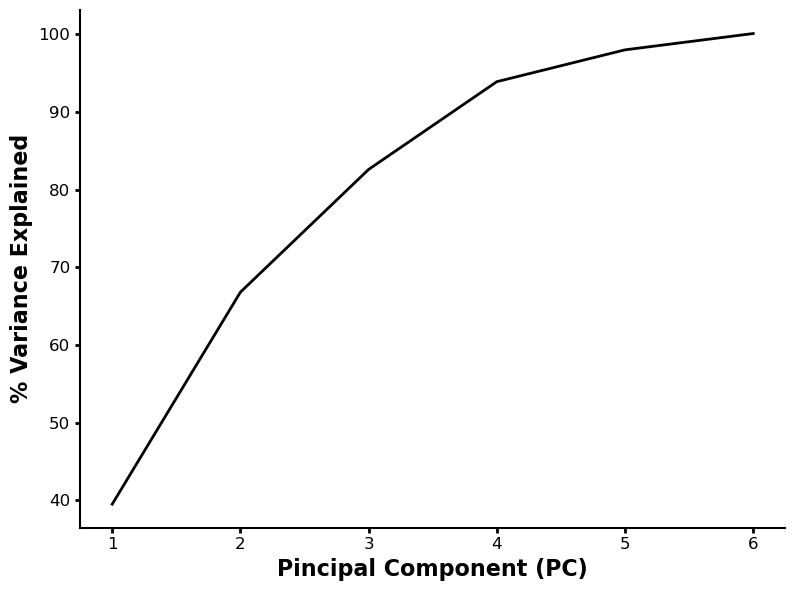

In [25]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)

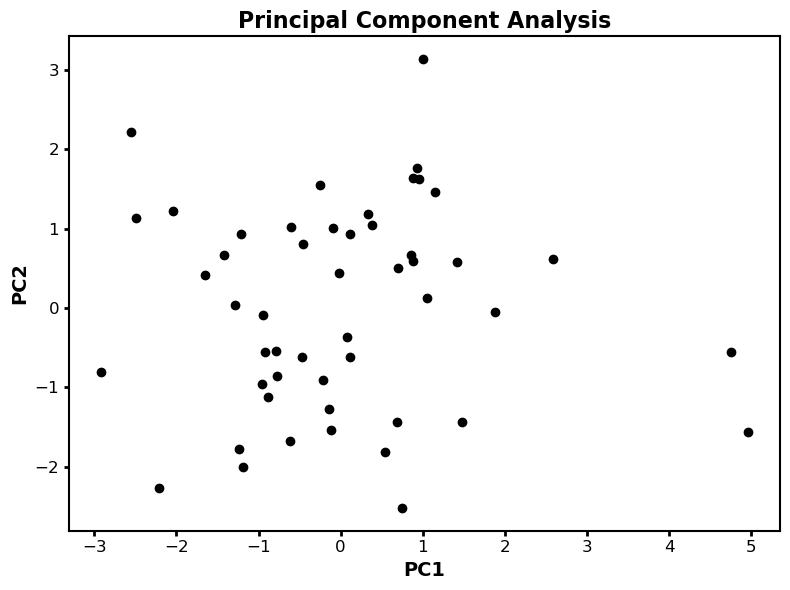

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1'],descriptors_pca['PC2'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

# K-means clustering and main features identification

In [27]:
# This normalization will be performed just for PC1 and PC2, but can be done for all the components.
scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# And we add the new values to our PCA table
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

In [28]:
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC1_normalized,PC2_normalized
0,0.683045,-1.434006,0.125964,-0.360663,-0.654368,-0.703188,0.086733,-0.253105
1,4.958366,-1.557857,-1.451328,1.358673,0.478622,0.111122,0.629613,-0.274965
2,-0.917902,-0.556659,0.363667,-0.763209,-0.139205,-0.331217,-0.116555,-0.098252
3,-1.239825,-1.780045,-1.385242,-0.392216,-0.456654,-0.175642,-0.157433,-0.314182
4,-0.887829,-1.126128,-0.348209,0.062345,0.023074,-0.233182,-0.112736,-0.198764
5,4.754989,-0.557063,0.376893,-0.309381,0.919942,0.609426,0.603788,-0.098323
6,-0.218619,-0.902951,-0.052197,-0.373704,0.027134,0.481876,-0.027760,-0.159373
7,-1.218205,0.933844,0.372892,-0.685956,-0.030630,0.404907,-0.154687,0.164826
8,-1.650074,0.414965,0.317857,-0.392034,-0.370177,0.107759,-0.209526,0.073242
9,-0.789693,-0.535741,0.411512,0.353532,-0.198321,0.299949,-0.100275,-0.094559


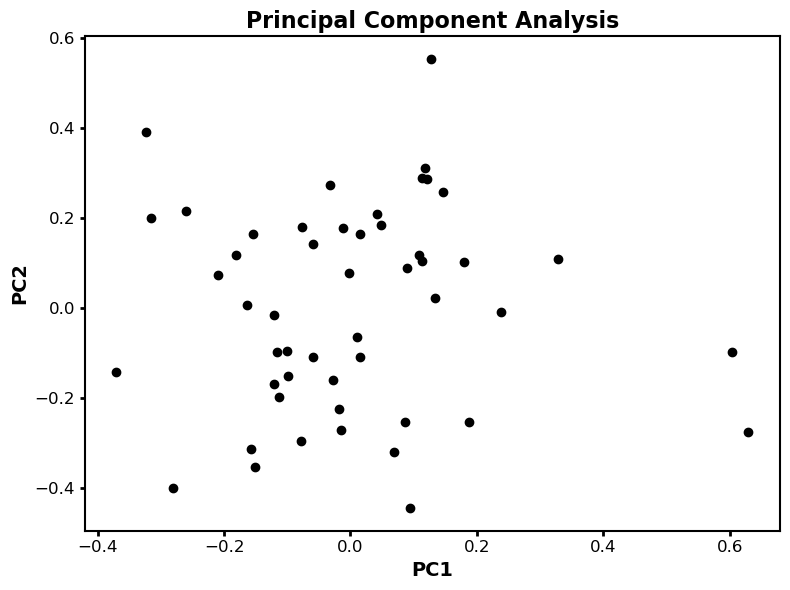

In [29]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1_normalized'],descriptors_pca['PC2_normalized'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

# k-means clustering

For n_clusters = 2 The average silhouette_score is : 0.41092302036036155
For n_clusters = 3 The average silhouette_score is : 0.4326293216656562
For n_clusters = 4 The average silhouette_score is : 0.4270734853251432
For n_clusters = 5 The average silhouette_score is : 0.367201564081155
For n_clusters = 6 The average silhouette_score is : 0.36743821761864415
For n_clusters = 7 The average silhouette_score is : 0.3924327428986908
For n_clusters = 8 The average silhouette_score is : 0.4212324761120868
For n_clusters = 9 The average silhouette_score is : 0.4200596606565453
For n_clusters = 10 The average silhouette_score is : 0.3982762146455395


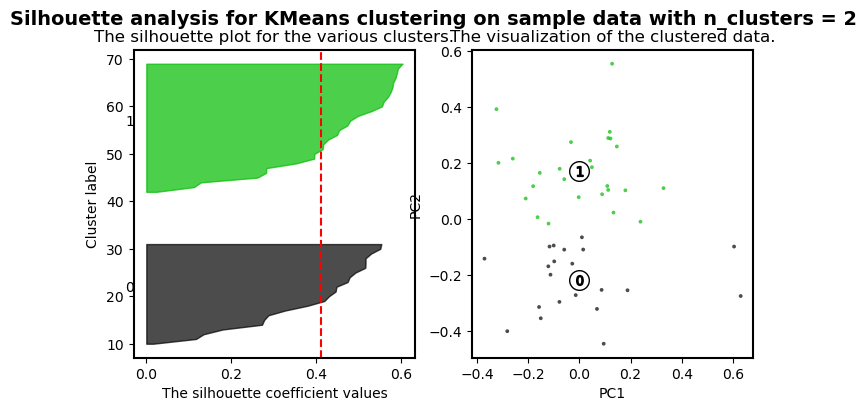

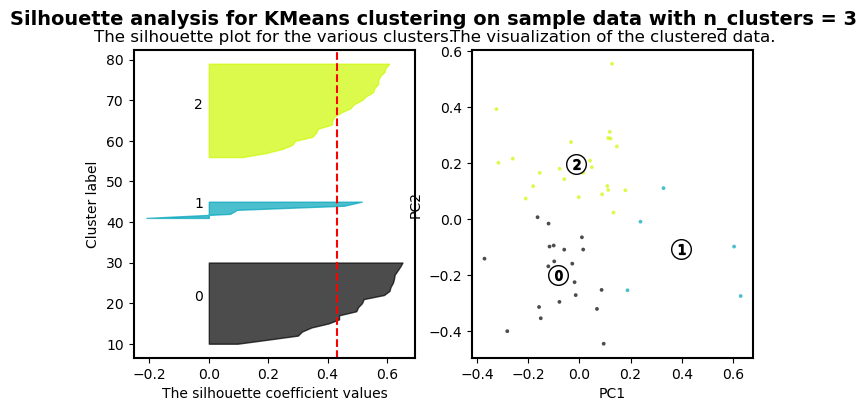

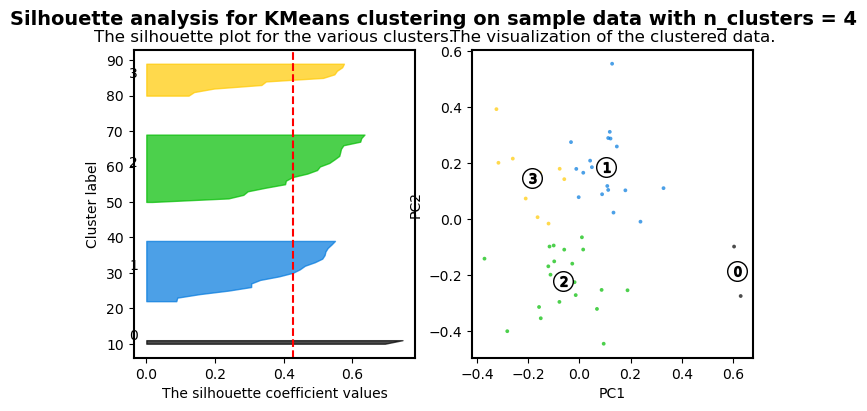

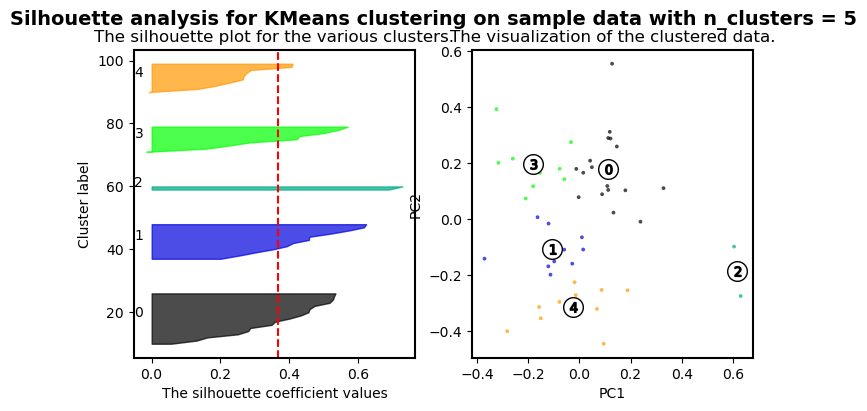

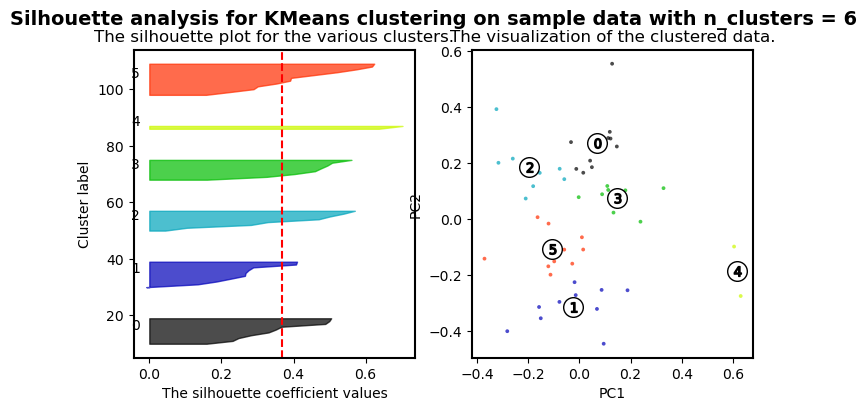

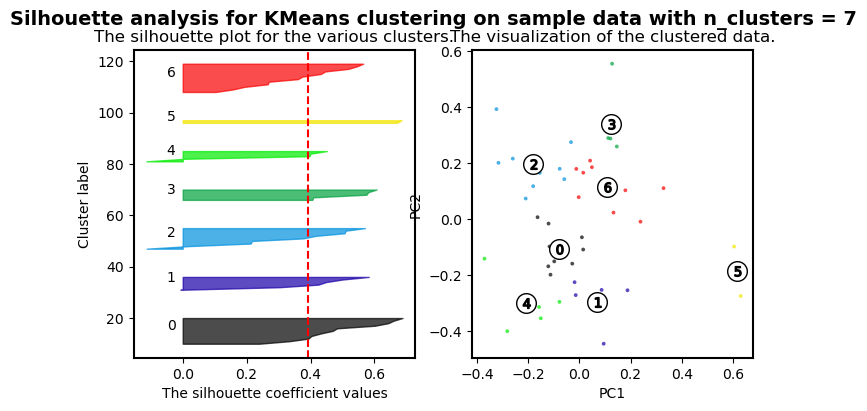

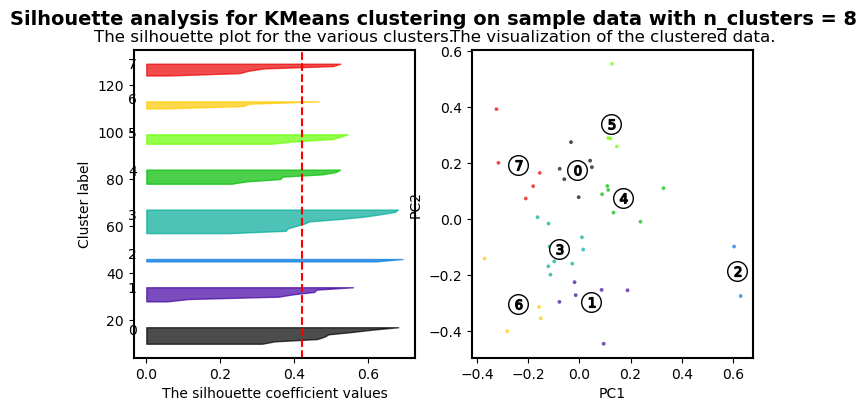

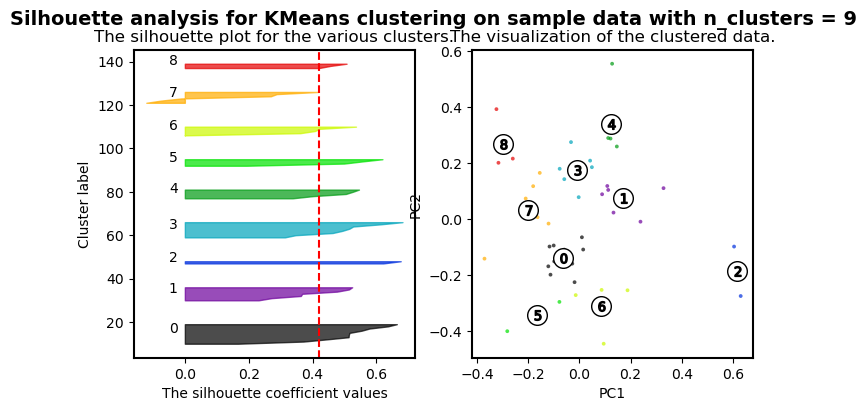

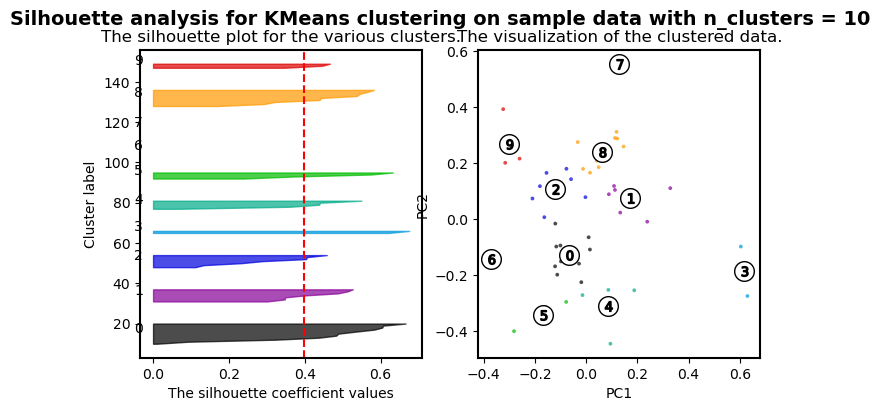

In [30]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    silhouette_avg = silhouette_score(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], 
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    
plt.show()

As higher the silhouette_score the better cluster distribution. Then, for our data:

For n_clusters = 3 The average silhouette_score is : 0.4326293216656562

2 clusters are the best for our data distribution. So, let´s use such number of clusters.

In [31]:
#Definimos el número de clusters

n_clusters = 7

In [32]:
kmeans = KMeans(n_clusters=n_clusters, random_state=10) # We define the best number of clusters
clusters = kmeans.fit(descriptors_pca[['PC1_normalized','PC2_normalized']]) #PC1 vs PC2 (normalized values)

cluster_info = pd.DataFrame()
cluster_info['ID'] = smiles_tabla.index
cluster_info['cluster'] = clusters.labels_

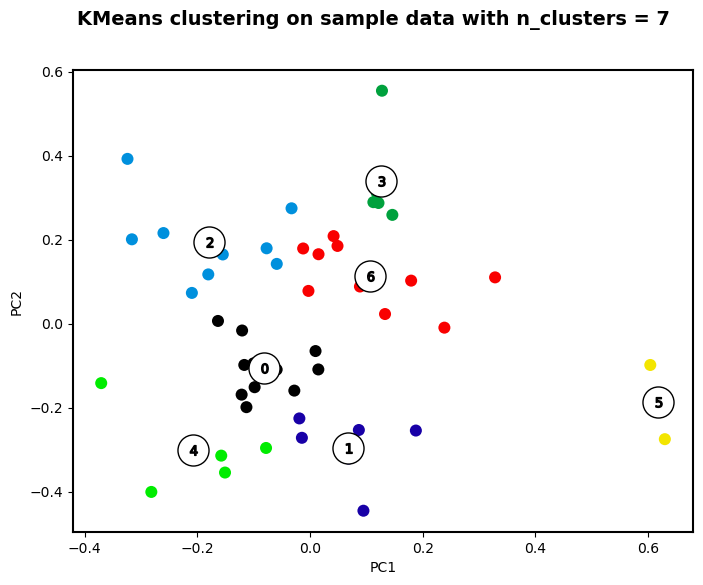

In [33]:
fig, (ax1)= plt.subplots(1, 1)
fig.set_size_inches(8, 6)
    
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
plt.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], 
                marker='.', s=300, lw=0, alpha=1,c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=500, edgecolor='k')
    
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
        
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")

plt.suptitle(("KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')

plt.savefig('KMeans_clustering.png')
plt.show()

In [34]:
descriptors_pca['Cluster_PC1_PC2'] = clusters.labels_
smiles_tabla['clusters'] = clusters.labels_

In [35]:
descriptors_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC1_normalized,PC2_normalized,Cluster_PC1_PC2
0,0.683045,-1.434006,0.125964,-0.360663,-0.654368,-0.703188,0.086733,-0.253105,1
1,4.958366,-1.557857,-1.451328,1.358673,0.478622,0.111122,0.629613,-0.274965,5
2,-0.917902,-0.556659,0.363667,-0.763209,-0.139205,-0.331217,-0.116555,-0.098252,0
3,-1.239825,-1.780045,-1.385242,-0.392216,-0.456654,-0.175642,-0.157433,-0.314182,4
4,-0.887829,-1.126128,-0.348209,0.062345,0.023074,-0.233182,-0.112736,-0.198764,0
5,4.754989,-0.557063,0.376893,-0.309381,0.919942,0.609426,0.603788,-0.098323,5
6,-0.218619,-0.902951,-0.052197,-0.373704,0.027134,0.481876,-0.027760,-0.159373,0
7,-1.218205,0.933844,0.372892,-0.685956,-0.030630,0.404907,-0.154687,0.164826,2
8,-1.650074,0.414965,0.317857,-0.392034,-0.370177,0.107759,-0.209526,0.073242,2
9,-0.789693,-0.535741,0.411512,0.353532,-0.198321,0.299949,-0.100275,-0.094559,0


## Now everything together
We will plot PC1 vs PC2 data. Each cluster will have a different color, and we will find the main feature for each principal component.

<Figure size 1000x800 with 0 Axes>

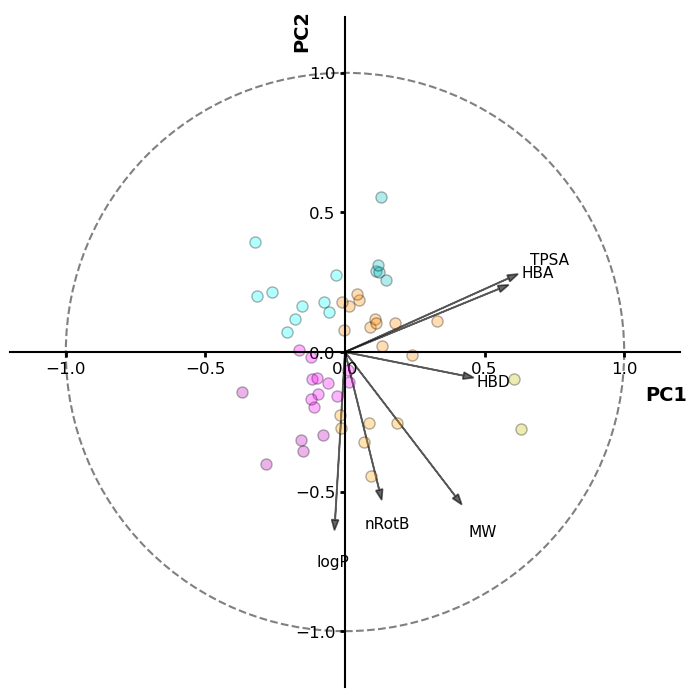

In [36]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(7,7))

color_code={ 0:        'magenta',\
             1.0:   'orange',\
             2.0:      'cyan',\
             3.0:           'c',\
             4.0:        'm',\
             5.0:        'y',\
             6.0:        'darkorange',
             7.0:       'k',
             }

for i in descriptors_pca.index: 
        ax.plot(descriptors_pca.loc[i].at['PC1_normalized'],descriptors_pca.loc[i].at['PC2_normalized'],
                    c=color_code[descriptors_pca.loc[i].at['Cluster_PC1_PC2']],
                    marker='o',markersize=8,markeredgecolor='k',alpha=0.3)
        

plt.xlabel ('PC1',fontsize=14,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)
plt.tick_params ('both',width=2,labelsize=12)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lab=['MW', 'TPSA', 'nRotB', 'HBD','HBA', 'logP'] #Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.6,linewidth=1.2,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=11)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')
ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.savefig('PC1_vs_PC2.png')
plt.show()

11


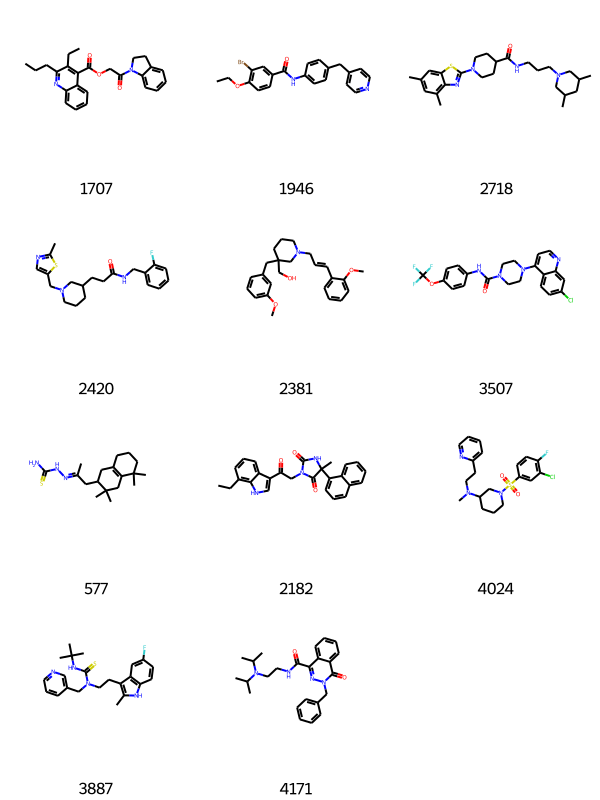

In [37]:
smiles_tabla_0 = (smiles_tabla[(smiles_tabla.clusters==0)])
smiles_tabla_0 = smiles_tabla_0.reset_index()
smiles_tabla_0 = smiles_tabla_0.drop(columns=['index', 'Unnamed: 0'])

print(len(smiles_tabla_0))
Chem.Draw.MolsToGridImage(smiles_tabla_0['moleculas'], legends = [(str(smiles_tabla_0['ID'][i])) for i in range(len(smiles_tabla_0))])

6


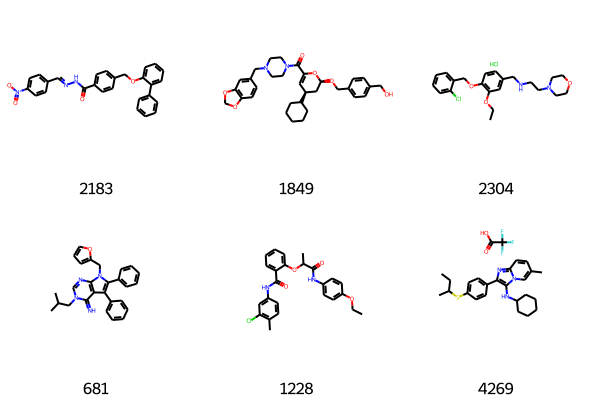

In [38]:
smiles_tabla_1 = (smiles_tabla[(smiles_tabla.clusters==1)])
smiles_tabla_1 = smiles_tabla_1.reset_index()
smiles_tabla_1 = smiles_tabla_1.drop(columns=['index', 'Unnamed: 0'])

print(len(smiles_tabla_1))
Chem.Draw.MolsToGridImage(smiles_tabla_1['moleculas'], legends = [(str(smiles_tabla_1['ID'][i])) for i in range(len(smiles_tabla_1))])

9


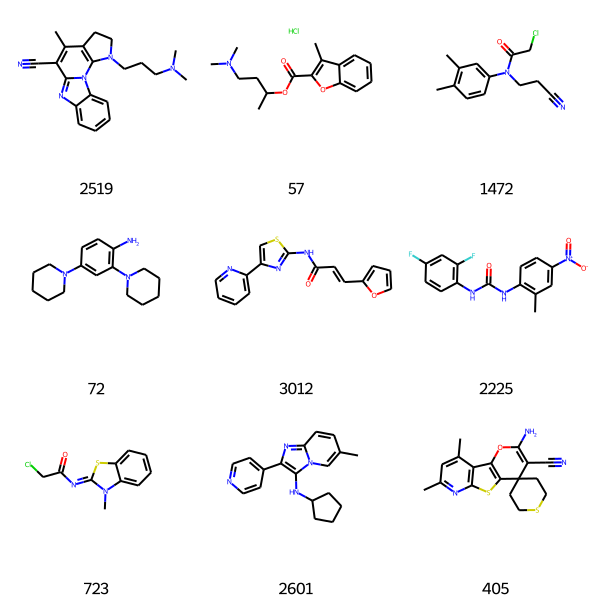

In [43]:
smiles_tabla_2 = (smiles_tabla[(smiles_tabla.clusters==2)])
smiles_tabla_2 = smiles_tabla_2.reset_index()
smiles_tabla_2 = smiles_tabla_2.drop(columns=['index', 'Unnamed: 0'])

print(len(smiles_tabla_2))
Chem.Draw.MolsToGridImage(smiles_tabla_2['moleculas'], legends = [(str(smiles_tabla_2['ID'][i])) for i in range(len(smiles_tabla_2))])

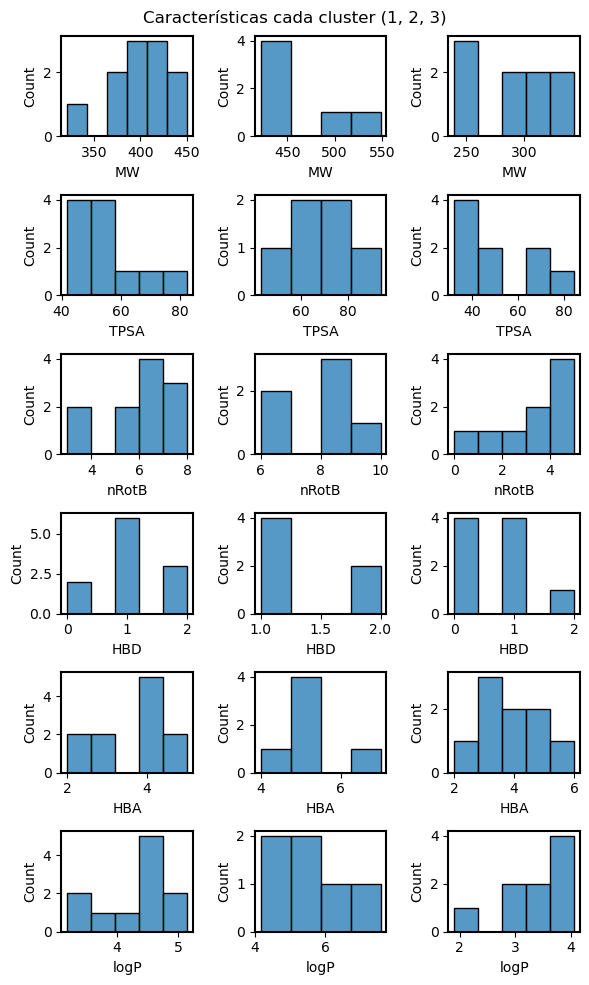

In [48]:
fig,axs = plt.subplots(6,3, figsize = (6,10))

sns.histplot(smiles_tabla_0['MW'], ax=axs[0,0])
sns.histplot(smiles_tabla_1['MW'], ax=axs[0,1])
sns.histplot(smiles_tabla_2['MW'], ax=axs[0,2])
sns.histplot(smiles_tabla_0['TPSA'], ax=axs[1,0])
sns.histplot(smiles_tabla_1['TPSA'], ax=axs[1,1])
sns.histplot(smiles_tabla_2['TPSA'], ax=axs[1,2])
sns.histplot(smiles_tabla_0['nRotB'], ax=axs[2,0])
sns.histplot(smiles_tabla_1['nRotB'], ax=axs[2,1])
sns.histplot(smiles_tabla_2['nRotB'], ax=axs[2,2])
sns.histplot(smiles_tabla_0['HBD'], ax=axs[3,0])
sns.histplot(smiles_tabla_1['HBD'], ax=axs[3,1])
sns.histplot(smiles_tabla_2['HBD'], ax=axs[3,2])
sns.histplot(smiles_tabla_0['HBA'], ax=axs[4,0])
sns.histplot(smiles_tabla_1['HBA'], ax=axs[4,1])
sns.histplot(smiles_tabla_2['HBA'], ax=axs[4,2])
sns.histplot(smiles_tabla_0['logP'], ax=axs[5,0])
sns.histplot(smiles_tabla_1['logP'], ax=axs[5,1])
sns.histplot(smiles_tabla_2['logP'], ax=axs[5,2])


fig.suptitle("Características cada cluster (1, 2, 3)")
fig.tight_layout()

plt.savefig('sns_comparacion_histogramas.png')

In [40]:
smiles_tabla = smiles_tabla.join(descriptors_pca)

In [41]:
smiles_tabla.head(10)

,Unnamed: 0,ID,smiles,moleculas,MW,TPSA,nRotB,HBD,HBA,logP,clusters,PC1,PC2,PC3,PC4,PC5,PC6,PC1_normalized,PC2_normalized,Cluster_PC1_PC2
0,0,2183,C1=CC=C(C=C1)C2=CC=CC=C2OCC3=CC=C(C=C3)C(=O)N/...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,451.153206,93.83,8.0,1.0,5.0,5.60470,1,0.683045,-1.434006,0.125964,-0.360663,-0.654368,-0.703188,0.086733,-0.253105,1
1,1,4185,COC1=NC2=C(C3=C(C=C(C=C3)Cl)N=C2C=C1)NC4=CC(=C...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,615.201348,151.51,7.0,5.0,8.0,5.15720,5,4.958366,-1.557857,-1.451328,1.358673,0.478622,0.111122,0.629613,-0.274965,5
2,2,1707,CCCC1=NC2=CC=CC=C2C(=C1CC)C(=O)OCC(=O)N3CCC4=C...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,402.194343,59.50,6.0,0.0,4.0,4.49580,0,-0.917902,-0.556659,0.363667,-0.763209,-0.139205,-0.331217,-0.116555,-0.098252,0
3,3,1312,CC(C)(C)C1=CC=C(C=C1)OP(=O)(C)NC2=CC=C(C=C2)SC...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,403.098271,38.33,5.0,1.0,3.0,6.90980,4,-1.239825,-1.780045,-1.385242,-0.392216,-0.456654,-0.175642,-0.157433,-0.314182,4
4,4,1946,CCOC1=C(C=C(C=C1)C(=O)NC2=CC=C(C=C2)CC3=CC=NC=...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,410.062990,51.22,6.0,1.0,3.0,5.08590,0,-0.887829,-1.126128,-0.348209,0.062345,0.023074,-0.233182,-0.112736,-0.198764,0
5,5,493,C[C@@H]1[C@H]([C@]2([C@H]3C4[C@]1([C@@H]5C=C(C...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,654.246497,144.28,7.0,3.0,10.0,3.12420,5,4.754989,-0.557063,0.376893,-0.309381,0.919942,0.609426,0.603788,-0.098323,5
6,6,2718,CC1CC(CN(C1)CCCNC(=O)C2CCN(CC2)C3=NC4=C(C=C(C=...,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,442.276633,48.47,6.0,1.0,5.0,4.61374,0,-0.218619,-0.902951,-0.052197,-0.373704,0.027134,0.481876,-0.027760,-0.159373,0
7,7,2519,CC1=C(C2=NC3=CC=CC=C3N2C4=C1CCN4CCCN(C)C)C#N,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,333.195346,47.57,4.0,0.0,5.0,2.98180,2,-1.218205,0.933844,0.372892,-0.685956,-0.030630,0.404907,-0.154687,0.164826,2
8,8,57,CC1=C(OC2=CC=CC=C12)C(=O)OC(C)CCN(C)C.Cl,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,311.128821,42.68,5.0,0.0,4.0,3.66002,2,-1.650074,0.414965,0.317857,-0.392034,-0.370177,0.107759,-0.209526,0.073242,2
9,9,2420,CC1=NC=C(S1)CN2CCCC(C2)CCC(=O)NCC3=CC=CC=C3F,<rdkit.Chem.rdchem.Mol object at 0x0000025A173...,375.178062,45.23,7.0,1.0,4.0,3.89922,0,-0.789693,-0.535741,0.411512,0.353532,-0.198321,0.299949,-0.100275,-0.094559,0


In [42]:
smiles_tabla.to_csv('smiles_tabla_sample_descriptors.csv')